# Final Project Submission

Please fill out:
* Student name: Andy Martin del Campo
* Student pace: full time
* Scheduled project review date/time: 9/11/19 @ 11 AM
* Instructor name: Victor
* Blog post URL:


# Who is this project aimed at?

- House flipping can be a lucrative business if done correctly. Knowing what exactly will add value to your house and which upgrades will benefit you the most can take away some of the stress and uncertainty. The following data will go on to show what are the biggest factors that influence the final selling price of a house. In the end I will pick out and show what 3 variables are the most influential and in my non-technical presentation I will go on to show how these can be used to your benefit. 

# Questions to ask

1. What is the benefit of being able to predict a selling price of a house?

2. Can the top 3 features be used to help someone flip houses or will investors have to dig deeper to make their money back on other changes?

3. What features can be elimated due to their lack of impact on the final price?

# Getting the data


In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#puts the CSV file into a pandas dataframe for viewing and manipulation
df = pd.read_csv('kc_house_data.csv')

In [92]:
#brief look at data
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [93]:
#get info on columns
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


## First Observations

- A waterfront, view, and yr_renovated have missing values. 

- Need to check other categories for place holder variables

- I can get rid of the id as long as there are not duplicates with the same values, the id will not affect the outcome as they are numbers that specify each house.

- For this project i also won't be using the date. Therefore I can drop it in the comming section. 

- Need to get everything in the right datatype.

# Cleaning the Data

## Check for duplicates

In [94]:
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

[0 rows x 21 columns]


- For the 'id' column there are several houses which have been relisted at several points. It is okay that they have the same value since the rest of the listing information is different


## Changing the column type to be something that makes sense

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [96]:
df.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
300.0       142
900.0       142
200.0       105
750.0       104
530.0       103
450.0       103
480.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
670.0        78
1100.0       78
780.0        76
550.0        76
650.0        75
240.0        74
380.0        73
680.0        73
850.0        72
          ...  
415.0         1
276.0         1
2050.0        1
225.0         1
1284.0        1
1798.0        1
861.0         1
1008.0        1
172.0         1
2180.0        1
935.0         1
875.0         1
2300.0        1
295.0         1
2250.0        1
2720.0        1
243.0         1
2730.0        1
1135.0        1
2240.0        1
2850.0        1
1481.0        1
2190.0        1
2610.0        1
2570.0        1
2580.0        1
1245.0        1
2120.0        1
2500.0        1
2490.0        1
Name: sqft_basement, Len

In [97]:
#Change sqft_basement from a string to a float
#The issue is there are a lot of '?' used. First I will change these to 0 
#values and then the data type to float
df.sqft_basement = df.sqft_basement.replace('?', 0)

df.sqft_basement = df.sqft_basement.astype('float64')

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(9), int64(11), object(1)
memory usage: 3.5+ MB


In [99]:
#drop the date and id columns
df = df.drop(columns = ['id','date'])

## Looking Into the Missing Values


I will now go through each variable that has any missing or strange values in them. I will start with waterfront which seems the easiest. Either the house in on the waterfront '1' or it is not '0'. Any value that is NaN I will just assume that it is not on the waterfront and set it eaqual to 0

### Set all values of waterfront that are not 1 to 0

In [100]:
df.waterfront = df.waterfront.fillna(0)

In [101]:
df.waterfront.describe()

count    21597.000000
mean         0.006760
std          0.081944
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waterfront, dtype: float64

In [102]:
df.waterfront.isna().sum()

0

As you can see from the code above, there are no more missing values in waterfront

### Edit yr_renovated so that any values below 1975 are 0 and all other values are 1 for renovated

I decided that for renovations, the year isn't as important as maybe rather it had been renovated at all. For any missing values of yr_renovated I will just set them equal to 0 and just assume that no major renovations have taken place for these houses.
Next if the renovations took place before 1975 I will just set that value equal to '0' and all other values will be '1' for was renovated. This turns yr_renovated into a categorical variable instead of having so many 0 values and then only a few years. 

In [103]:
df.yr_renovated = df.yr_renovated.fillna(0)

In [104]:
df.yr_renovated.describe()

count    21597.000000
mean        68.758207
std        364.037499
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [105]:
df.yr_renovated.value_counts()

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

In [106]:
#set yr_renovated into an int since all years are whole numbers
df.yr_renovated = df.yr_renovated.astype('int64')

In [107]:
df.loc[df.yr_renovated < 1975, 'yr_renovated'] = 0
df.loc[df.yr_renovated != 0, 'yr_renovated'] = 1

In [108]:
df.yr_renovated.describe()

count    21597.000000
mean         0.030977
std          0.173258
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: yr_renovated, dtype: float64

In [109]:
df.yr_renovated.isna().sum()

0

### What to do with view?

There is no information for what exactly determines view. Is it waterfront, mountain facing, etc? With an exact address of a house and a map that maybe shows what the house faces a view value could be determined based on the other variables. But since this is out of the scope of this project I will drop all of the missing view rows.

In [110]:
df.view.describe()

count    21534.000000
mean         0.233863
std          0.765686
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64

In [111]:
df.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [112]:
#Since this is the last varaibel with missing values I just went through the whole dataframe and deleted all rows with
#NaN  in the view column
df = df.dropna()

In [113]:
df.view.describe()

count    21534.000000
mean         0.233863
std          0.765686
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64

In [114]:
df.view.isna().sum()

0

## Limit price to 1 Million


For this project I wanted to focus on houses that were less than $1 million. That way there aren't any large outliers for very extravagant houses that are out of reach for most people

In [115]:
df.drop(df[df.price > 1000000].index, inplace = True)

I decided to limit the price to 1 million to get rid of a lot of outliers. Depending on who you are modeling for a lot of houses are way out of people's price ranges. Limiting it to 1 million seemed like a fair compromise. 

## Look at data

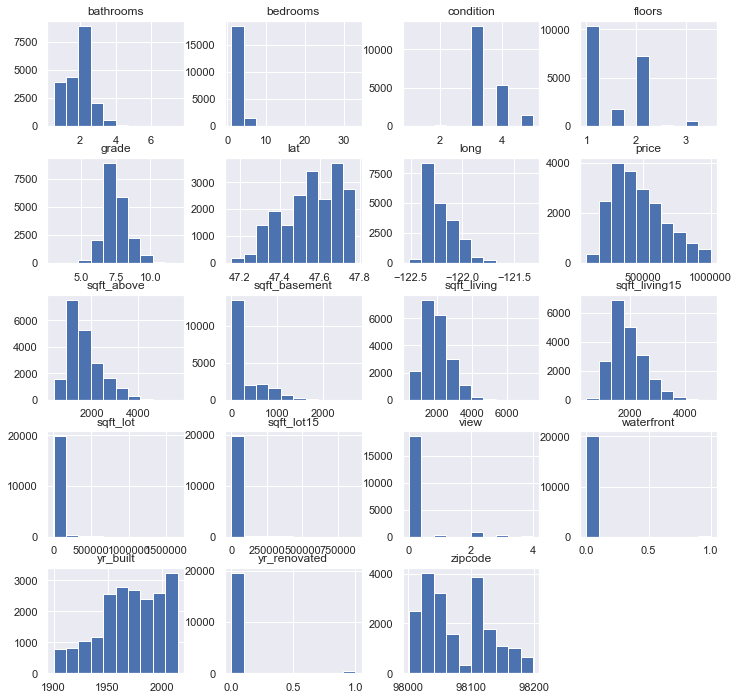

In [116]:
df.hist(figsize=(12,12));

Certain variables are already looking like categorical variables and others seem to have a normal distribution

### Look at distribution of prices


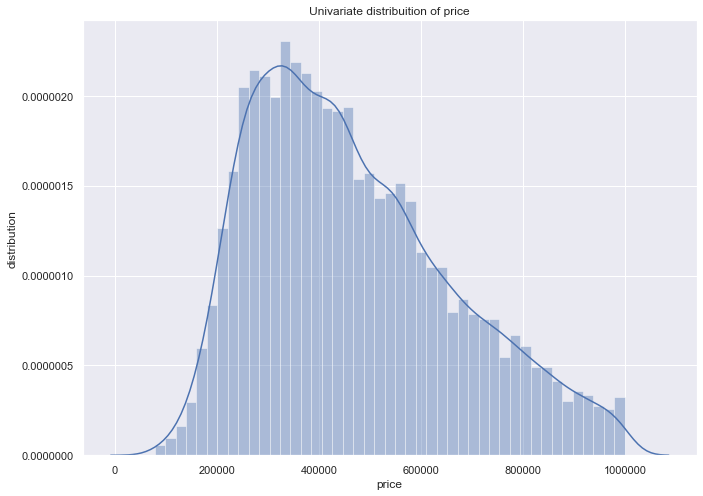

In [117]:
sns.set(rc={'figure.figsize':(11, 8)})
sns.distplot(df['price'])
plt.xlabel('price')
plt.ylabel('distribution')
plt.title('Univariate distribuition of price')
plt.show()

As you can see from the above graph. Limiting the price to 1 million normalizes the data better with the left side being heavier still. 

## Using Seaborn Pairplot to see each scatterplot with a regression line

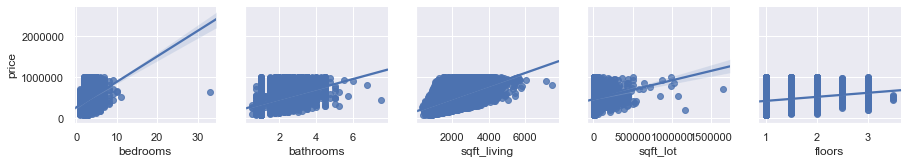

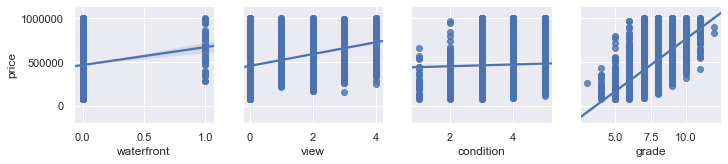

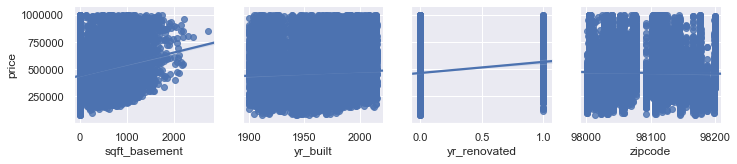

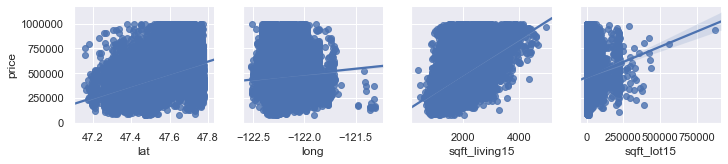

In [120]:
sns.pairplot(df, x_vars=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors'], y_vars='price', kind='reg');
sns.pairplot(df, x_vars=['waterfront', 'view', 'condition', 'grade'], y_vars='price', kind='reg');
sns.pairplot(df, x_vars=['sqft_basement', 'yr_built', 'yr_renovated', 'zipcode'], y_vars='price', kind='reg');
sns.pairplot(df, x_vars=['lat', 'long', 'sqft_living15', 'sqft_lot15'], y_vars='price', kind='reg');

- There seem to be a few categorical variables
    -floors
    -waterfront
    -view
    -condition
    -grade
    -yr_renovated
- Also looking at these plots, I want to limit other values for the same reason I limited price
    - Bedrooms less than 10
    - Bathrooms less than 5
    - Sqft less than 6,000
    - Sqft_Lot and Sqlft_Lot15 less than 500,000

In [122]:
df.drop(df[df.bedrooms > 10].index, inplace = True)
df.drop(df[df.bathrooms > 5].index, inplace = True)
df.drop(df[df.sqft_living > 6000].index, inplace = True)
df.drop(df[df.sqft_lot > 500000].index, inplace = True)
df.drop(df[df.sqft_lot15 > 500000].index, inplace = True)

Look at Plots again to see if this removed the values I wanted it to.


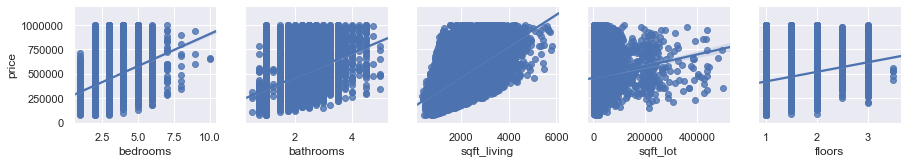

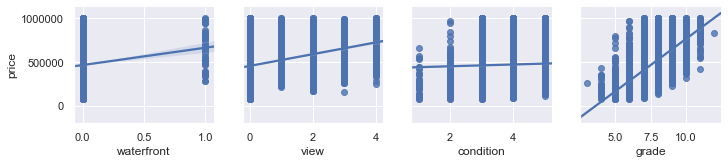

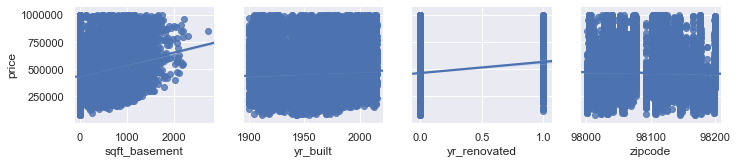

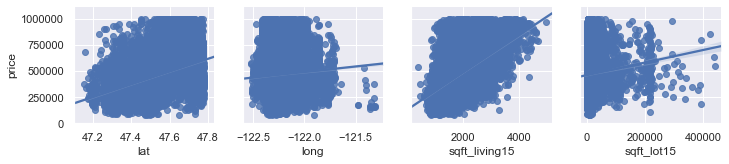

In [123]:
sns.pairplot(df, x_vars=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors'], y_vars='price', kind='reg');
sns.pairplot(df, x_vars=['waterfront', 'view', 'condition', 'grade'], y_vars='price', kind='reg');
sns.pairplot(df, x_vars=['sqft_basement', 'yr_built', 'yr_renovated', 'zipcode'], y_vars='price', kind='reg');
sns.pairplot(df, x_vars=['lat', 'long', 'sqft_living15', 'sqft_lot15'], y_vars='price', kind='reg');

## A Model Using Raw Features

In [124]:
from statsmodels.formula.api import ols

outcome = 'price'
predictors = []
for col in df:
    if col != 'price':
        predictors.append(col)
predictors = '+'.join(predictors)

formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     2493.
Date:                Thu, 19 Sep 2019   Prob (F-statistic):               0.00
Time:                        13:59:35   Log-Likelihood:            -2.6106e+05
No. Observations:               20053   AIC:                         5.222e+05
Df Residuals:                   20034   BIC:                         5.223e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6.503e+06   1.65e+06     -3.935      0.000   -9.74e+06   -3.26e+06
bedrooms      -9463.4446   1152.590     -8.211      0.000   -1.17e+04   -7204.273
bathrooms      2.398e+04   1914.058     12.530      0.000    2.02e+04    2.77e+04
sqft_living      61.2729     10.929      5.606      0.000      39.851      82.695
sqft_lot          0.2689      0.040      6.696      0.000       0.190       0.348
floors         3.183e+04   2078.583     15.313      0.000    2.78e+04    3.59e+04
waterfront     1.399e+05   1.63e+04      8.569      0.000    1.08e+05    1.72e+05
view           2.761e+04   1371.541     20.134      0.000    2.49e+04    3.03e+04
condition      2.529e+04   1324.368     19.098      0.000    2.27e+04    2.79e+04
grade           6.93e+04   1266.346     54.723      0.000    6.68e+04    7.18e+04
sqft_above        8.1309     10.900      0.746      0.456     -13.235      29.496
sqft_basement     5.7763     10.818      0.534      0.593     -15.429      26.981
yr_built      -1754.9587     41.569    -42.218      0.000   -1836.437   -1673.480
yr_renovated   3.532e+04   5029.894      7.021      0.000    2.55e+04    4.52e+04
zipcode        -210.1897     18.628    -11.284      0.000    -246.702    -173.677
lat            5.395e+05   5934.397     90.908      0.000    5.28e+05    5.51e+05
long           -3.67e+04   7358.897     -4.988      0.000   -5.11e+04   -2.23e+04
sqft_living15    47.1412      2.136     22.071      0.000      42.955      51.328
sqft_lot15       -0.1817      0.050     -3.622      0.000      -0.280      -0.083
==============================================================================
Omnibus:                     1146.697   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1789.176
Skew:                           0.483   Prob(JB):                         0.00
Kurtosis:                       4.099   Cond. No.                     2.15e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Observations
The first model here uses all of the features unaltered. This way I would be able to see any change when I run the model later. 
The model starts off with a relatively high Adjusted R-Squared of 0.69 so it will be interesting to see if it finishes higher or lower. 

## Test for Colinearity

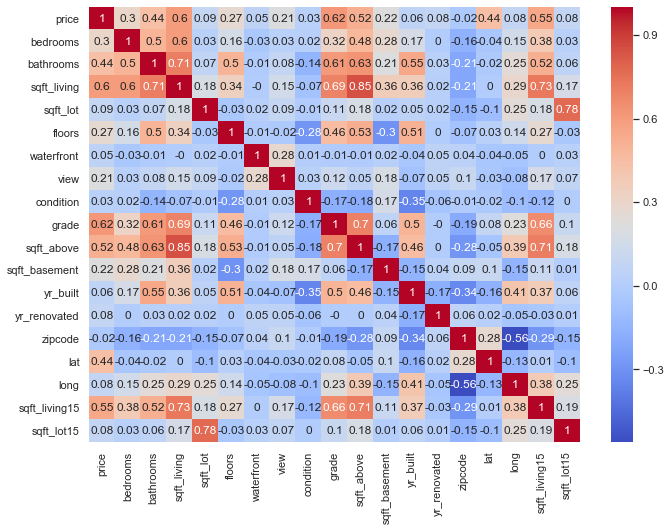

In [125]:
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm');

### Observations of Heat Map
It is easy to quickly glance and see what features are going to affect price the most:
 - grade, bathrooms, sqft_living, latitude, and sqft_living15

In [126]:
abs(df.corr())  > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


Sqft_living has a high colinearity with sqft_above. Since they both seem to have the same information I will just drop sqft_above.
Sqft_lot has a high colinearity with sqft_lot15. 

In [127]:
df = df.drop(columns = ['sqft_above', 'sqft_lot15'])

## Ploting Grade, Sqft_living, Sqft_living15


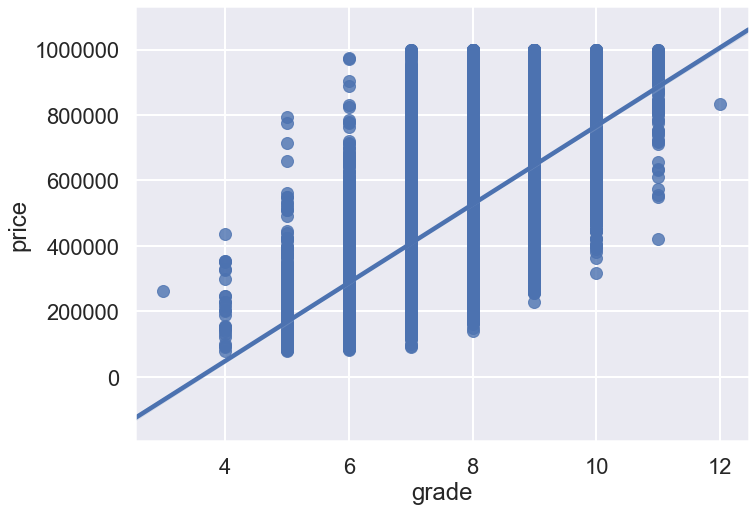

In [128]:
sns.set_context('poster')
sns.regplot(x=df.grade, y=df.price, data=df);

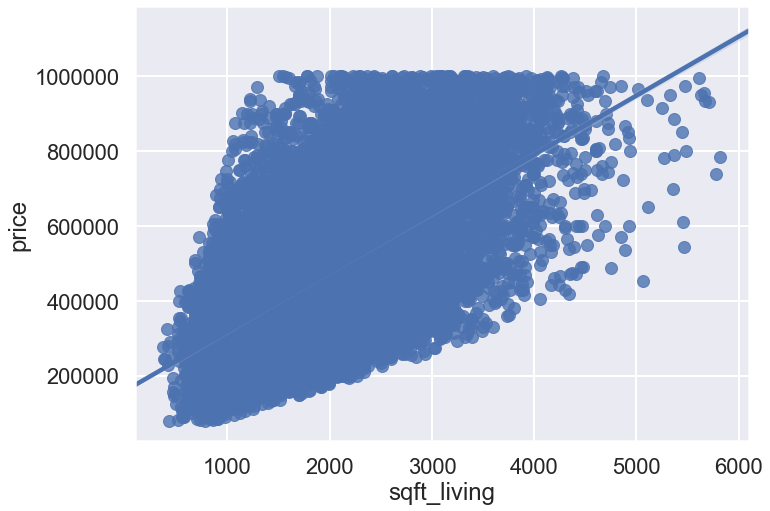

In [129]:
sns.regplot(x=df.sqft_living, y=df.price, data=df);

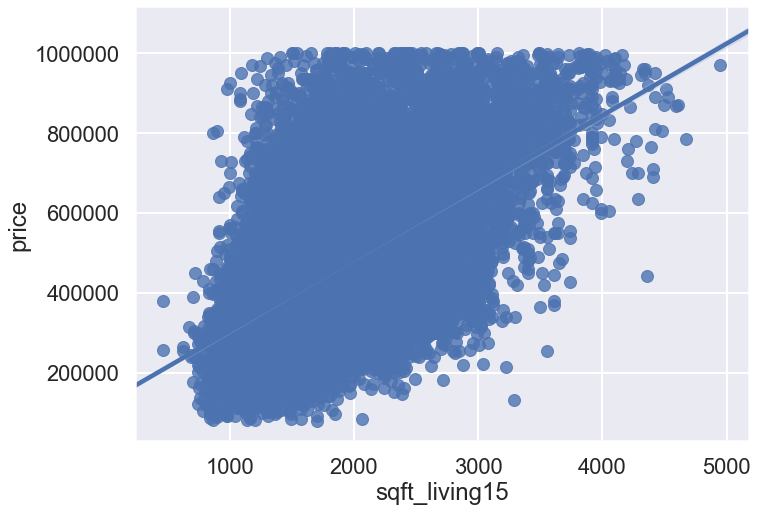

In [44]:
sns.regplot(x=imputed_df.sqft_living15, y=imputed_df.price, data=imputed_df);

In [130]:
sns.set_context('paper')

### Why plot these 3?

From the heat map and colinearity visual you can see that these three features have the highest colinearity with price. I wanted to have a better visual with these three since I think they will be more important than other features.

## Deal with Categorical Variables

### For categorical variables, if they are floats they will produce an odd column name

- View, waterfront, and condition are all integer values so I will change their datatype to int

- For floors, I will just round up the decimal so any 1.5 story house would become 2 and so on. This is to make working with categorical variables easier but also their could be very small discrepancies with a 1.5 and 2 story house. This would eliminate the need to know those small details

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20053 entries, 0 to 21596
Data columns (total 17 columns):
price            20053 non-null float64
bedrooms         20053 non-null int64
bathrooms        20053 non-null float64
sqft_living      20053 non-null int64
sqft_lot         20053 non-null int64
floors           20053 non-null float64
waterfront       20053 non-null float64
view             20053 non-null float64
condition        20053 non-null int64
grade            20053 non-null int64
sqft_basement    20053 non-null float64
yr_built         20053 non-null int64
yr_renovated     20053 non-null int64
zipcode          20053 non-null int64
lat              20053 non-null float64
long             20053 non-null float64
sqft_living15    20053 non-null int64
dtypes: float64(8), int64(9)
memory usage: 2.8 MB


In [135]:
#change condition to int64
df.condition = df.condition.astype('int64')

In [136]:
#change view to int64
df.view = df.view.astype('int64')

In [137]:
#change bedrooms to int64
df.bedrooms = df.bedrooms.astype('int64')

In [138]:
#I rounded floors to get rid of the float values instead of losing the extra floor.
df.floors = df.floors.round()
df.floors = df.floors.astype('int64')

In [140]:
#change grade to int64
df.grade = df.grade.astype('int64')

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20053 entries, 0 to 21596
Data columns (total 17 columns):
price            20053 non-null float64
bedrooms         20053 non-null int64
bathrooms        20053 non-null float64
sqft_living      20053 non-null int64
sqft_lot         20053 non-null int64
floors           20053 non-null int64
waterfront       20053 non-null float64
view             20053 non-null int64
condition        20053 non-null int64
grade            20053 non-null int64
sqft_basement    20053 non-null float64
yr_built         20053 non-null int64
yr_renovated     20053 non-null int64
zipcode          20053 non-null int64
lat              20053 non-null float64
long             20053 non-null float64
sqft_living15    20053 non-null int64
dtypes: float64(6), int64(11)
memory usage: 2.8 MB


In [142]:
#Creating the dummy variables
floor_dummies = pd.get_dummies(df['floors'], prefix='flr', 
                                   drop_first=True)
view_dummies = pd.get_dummies(df['view'], prefix='view', 
                                   drop_first=True)
grade_dummies =  pd.get_dummies(df['grade'], prefix='grade', 
                                 drop_first=True)
condition_dummies = pd.get_dummies(df['condition'], prefix='cond', 
                                   drop_first=True)
bedroom_dummies = pd.get_dummies(df['bedrooms'], prefix='bdrm', 
                                   drop_first=True)

In [143]:
#Remove old variables columns
df = df.drop(['bedrooms', 'floors', 'view', 'grade',
                     'condition'], axis=1)

In [144]:
#Add new dummy columns
df = pd.concat([df, floor_dummies, bedroom_dummies, 
               view_dummies, condition_dummies, grade_dummies], axis=1)

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20053 entries, 0 to 21596
Data columns (total 41 columns):
price            20053 non-null float64
bathrooms        20053 non-null float64
sqft_living      20053 non-null int64
sqft_lot         20053 non-null int64
waterfront       20053 non-null float64
sqft_basement    20053 non-null float64
yr_built         20053 non-null int64
yr_renovated     20053 non-null int64
zipcode          20053 non-null int64
lat              20053 non-null float64
long             20053 non-null float64
sqft_living15    20053 non-null int64
flr_2            20053 non-null uint8
flr_3            20053 non-null uint8
flr_4            20053 non-null uint8
bdrm_2           20053 non-null uint8
bdrm_3           20053 non-null uint8
bdrm_4           20053 non-null uint8
bdrm_5           20053 non-null uint8
bdrm_6           20053 non-null uint8
bdrm_7           20053 non-null uint8
bdrm_8           20053 non-null uint8
bdrm_9           20053 non-null uint8
bdrm_

## Apply Log Transform to Non-Normal Features


Log transforms can further normalize the data as can be seen by the following graphs

In [146]:
to_log = ['sqft_living', 'sqft_lot', 'yr_built',
              'sqft_living15']
df_log = pd.DataFrame([])
for feat in to_log:
    df[feat] = df[feat].map(lambda x: np.log(x) if x > 1 else 0)
    df_log[feat] = df[feat]

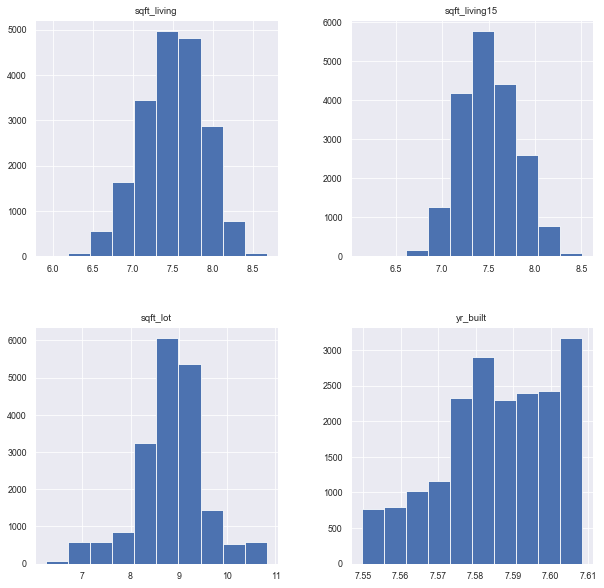

In [58]:
df_log.hist(figsize=(10,10));

## Apply Min-Max Scaling

Min-max scaling puts all values between 0 and 1 to more easily compare without units

In [147]:
to_scale = ['sqft_living', 'sqft_lot', 'sqft_basement', 'yr_built',
              'bathrooms', 'sqft_living15', 'lat', 'long', 'zipcode']
    
df_scaled = pd.DataFrame([])
for feat in to_scale:
    scaled = df[feat]
    df[feat] = (scaled-min(scaled))/(max(scaled)-min(scaled))
    df_scaled[feat] = df[feat]

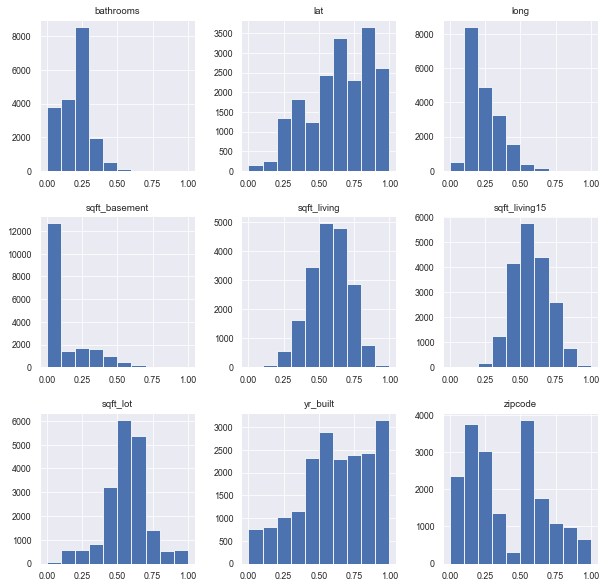

In [60]:
df_scaled.hist(figsize=(10,10));

In [61]:
df.head()

,price,bathrooms,sqft_living,sqft_lot,waterfront,sqft_basement,yr_built,yr_renovated,zipcode,lat,...,cond_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12
0,221900.0,0.071429,0.420884,0.522637,0.0,0.000000,0.485598,0,0.893939,0.571498,...,0,0,0,0,1,0,0,0,0,0
1,538000.0,0.250000,0.703365,0.577022,0.0,0.173913,0.450745,1,0.626263,0.908959,...,0,0,0,0,1,0,0,0,0,0
2,180000.0,0.071429,0.265968,0.647717,0.0,0.000000,0.293018,0,0.136364,0.936143,...,0,0,0,1,0,0,0,0,0,0
3,604000.0,0.357143,0.605032,0.495862,0.0,0.395652,0.572419,0,0.681818,0.586939,...,1,0,0,0,1,0,0,0,0,0
4,510000.0,0.214286,0.549090,0.601011,0.0,0.000000,0.761879,0,0.368687,0.741354,...,0,0,0,0,0,1,0,0,0,0


In [62]:
df.describe()

,price,bathrooms,sqft_living,sqft_lot,waterfront,sqft_basement,yr_built,yr_renovated,zipcode,lat,...,cond_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12
count,19236.000000,19236.000000,19236.000000,19236.000000,19236.000000,19236.000000,19236.000000,19236.000000,19236.000000,19236.000000,...,19236.000000,19236.000000,19236.000000,19236.000000,19236.000000,19236.000000,19236.000000,19236.000000,19236.000000,19236.000000
mean,464062.796683,0.218517,0.573039,0.566156,0.001975,0.111476,0.617070,0.026045,0.399294,0.647865,...,0.076211,0.001300,0.011437,0.101944,0.450925,0.292836,0.106155,0.031244,0.004055,0.000052
std,195628.237476,0.099815,0.140890,0.152702,0.044403,0.172366,0.254486,0.159273,0.271396,0.225202,...,0.265343,0.036028,0.106333,0.302583,0.497599,0.455076,0.308044,0.173980,0.063550,0.007210
min,78000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,310000.000000,0.142857,0.477703,0.495862,0.000000,0.000000,0.450745,0.000000,0.161616,0.498472,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,429950.000000,0.214286,0.578138,0.579280,0.000000,0.000000,0.641558,0.000000,0.358586,0.662699,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,588000.000000,0.285714,0.675492,0.642732,0.000000,0.217391,0.838782,0.000000,0.590909,0.844298,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1000000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Run Model

In [148]:
outcome = 'price'
predictors = df.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + '~' + pred_sum

In [149]:
model = ols(formula=formula, data=df).fit()

In [150]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     1131.
Date:                Thu, 19 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:07:31   Log-Likelihood:            -2.6100e+05
No. Observations:               20053   AIC:                         5.221e+05
Df Residuals:                   20012   BIC:                         5.224e+05
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.778e+04   1.11e+05      0.250      0.802    -1.9e+05    2.45e+05
bathrooms      1.016e+05   8710.579     11.665      0.000    8.45e+04    1.19e+05
sqft_living    3.849e+05   1.32e+04     29.112      0.000    3.59e+05    4.11e+05
sqft_lot       -6.67e+04   7915.686     -8.427      0.000   -8.22e+04   -5.12e+04
waterfront     1.303e+05   1.78e+04      7.301      0.000    9.53e+04    1.65e+05
sqft_basement -9396.5017   7414.503     -1.267      0.205   -2.39e+04    5136.536
yr_built      -1.951e+05   4915.988    -39.680      0.000   -2.05e+05   -1.85e+05
yr_renovated   3.935e+04   5037.068      7.813      0.000    2.95e+04    4.92e+04
zipcode       -4.296e+04   3717.068    -11.558      0.000   -5.02e+04   -3.57e+04
lat            3.304e+05   3735.317     88.444      0.000    3.23e+05    3.38e+05
long          -1.262e+04   9045.149     -1.395      0.163   -3.04e+04    5107.766
sqft_living15  2.163e+05   1.04e+04     20.837      0.000    1.96e+05    2.37e+05
flr_2          2.003e+04   2209.375      9.066      0.000    1.57e+04    2.44e+04
flr_3          4.431e+04   5524.758      8.021      0.000    3.35e+04    5.51e+04
flr_4          5.363e+04   4.46e+04      1.203      0.229   -3.37e+04    1.41e+05
bdrm_2         -627.6377   8346.575     -0.075      0.940    -1.7e+04    1.57e+04
bdrm_3         -2.65e+04   8411.839     -3.151      0.002    -4.3e+04      -1e+04
bdrm_4        -3.268e+04   8660.234     -3.774      0.000   -4.97e+04   -1.57e+04
bdrm_5        -3.601e+04   9204.186     -3.912      0.000    -5.4e+04    -1.8e+04
bdrm_6        -3.689e+04   1.16e+04     -3.193      0.001   -5.95e+04   -1.42e+04
bdrm_7        -4.355e+04   2.25e+04     -1.936      0.053   -8.77e+04     543.204
bdrm_8        -2.519e+04   3.75e+04     -0.672      0.501   -9.86e+04    4.82e+04
bdrm_9         3.853e+04   6.36e+04      0.606      0.545   -8.61e+04    1.63e+05
bdrm_10       -3798.8774   7.75e+04     -0.049      0.961   -1.56e+05    1.48e+05
view_1          6.96e+04   6900.956     10.086      0.000    5.61e+04    8.31e+04
view_2         6.031e+04   4141.243     14.564      0.000    5.22e+04    6.84e+04
view_3         6.792e+04   6309.889     10.764      0.000    5.55e+04    8.03e+04
view_4         1.325e+05   1.11e+04     11.924      0.000    1.11e+05    1.54e+05
cond_2         5.413e+04   2.23e+04      2.425      0.015    1.04e+04    9.79e+04
cond_3         7.246e+04   2.08e+04      3.483      0.000    3.17e+04    1.13e+05
cond_4         9.639e+04   2.08e+04      4.633      0.000    5.56e+04    1.37e+05
cond_5         1.253e+05   2.09e+04      5.981      0.000    8.42e+04    1.66e+05
grade_4       -1.684e+05   1.11e+05     -1.517      0.129   -3.86e+05    4.92e+04
grade_5       -1.804e+05   1.09e+05     -1.649      0.099   -3.95e+05     3.4e+04
grade_6       -1.594e+05   1.09e+05     -1.459   

### Observations of newest model
1. Adjusted R-Squared went up
2. Skew and Kurtosis both marginally went down

## Feature Scaling

### Stepwise Selection

The following function will limit any feature so that they will all be below the 0.05 p-value threshold.

In [151]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [153]:
result = stepwise_selection(predictors, df["price"], verbose = True)
print('resulting features:')
print(result)

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Add  grade_6                        with p-value 0.0
Add  sqft_living15                  with p-value 0.0
Add  grade_7                        with p-value 0.0
Add  yr_built                       with p-value 0.0
Add  bathrooms                      with p-value 0.0
Add  lat                            with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  grade_8                        with p-value 5.20049e-256
Add  grade_5                        with p-value 1.20551e-210
Add  view_4                         with p-value 4.35799e-54
Add  grade_10                       with p-value 1.86997e-41
Add  cond_5                         with p-value 3.66594e-36
Add  view_2                         with p-value 8.77195e-36
Add  grade_4                        with p-value 4.1646e-30
Add  cond_4                         with p-value 4.79003e-24
Add  sqft_lot                       with p-value 3.06691e-28
Add  grade_11                       with p-value 1.95904e-25
Add  view_3       

In [154]:
outcome = 'price'
predictors = result
pred_sum = "+".join(predictors)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     1672.
Date:                Thu, 19 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:09:24   Log-Likelihood:            -2.6102e+05
No. Observations:               20053   AIC:                         5.221e+05
Df Residuals:                   20025   BIC:                         5.223e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.178e+05   1.24e+04      9.461      0.000    9.34e+04    1.42e+05
grade_6        -2.28e+05   4617.348    -49.374      0.000   -2.37e+05   -2.19e+05
sqft_living15  2.179e+05   1.02e+04     21.283      0.000    1.98e+05    2.38e+05
grade_7       -1.789e+05   3284.977    -54.466      0.000   -1.85e+05   -1.72e+05
yr_built      -1.958e+05   4670.785    -41.914      0.000   -2.05e+05   -1.87e+05
bathrooms       9.98e+04   8533.483     11.695      0.000    8.31e+04    1.17e+05
lat            3.297e+05   3703.621     89.016      0.000    3.22e+05    3.37e+05
sqft_living     3.66e+05   1.14e+04     32.190      0.000    3.44e+05    3.88e+05
grade_8       -1.065e+05   2896.986    -36.764      0.000   -1.12e+05   -1.01e+05
grade_5       -2.483e+05   8341.435    -29.766      0.000   -2.65e+05   -2.32e+05
view_4         1.323e+05   1.11e+04     11.919      0.000    1.11e+05    1.54e+05
grade_10        7.49e+04   4806.299     15.583      0.000    6.55e+04    8.43e+04
cond_5          7.75e+04   8389.249      9.238      0.000    6.11e+04    9.39e+04
view_2         6.032e+04   4128.600     14.610      0.000    5.22e+04    6.84e+04
grade_4       -2.286e+05   2.17e+04    -10.554      0.000   -2.71e+05   -1.86e+05
cond_4         4.895e+04   8032.581      6.094      0.000    3.32e+04    6.47e+04
sqft_lot      -6.771e+04   7523.389     -9.000      0.000   -8.25e+04    -5.3e+04
grade_11       1.254e+05   1.18e+04     10.592      0.000    1.02e+05    1.49e+05
view_3         6.817e+04   6290.742     10.836      0.000    5.58e+04    8.05e+04
zipcode       -4.084e+04   3389.125    -12.050      0.000   -4.75e+04   -3.42e+04
view_1         6.965e+04   6886.521     10.114      0.000    5.62e+04    8.31e+04
bdrm_2         2.901e+04   3035.884      9.555      0.000    2.31e+04     3.5e+04
flr_2          2.112e+04   1904.707     11.090      0.000    1.74e+04    2.49e+04
flr_3          4.594e+04   5388.767      8.524      0.000    3.54e+04    5.65e+04
yr_renovated   3.958e+04   5030.675      7.867      0.000    2.97e+04    4.94e+04
waterfront     1.321e+05   1.78e+04      7.404      0.000    9.71e+04    1.67e+05
cond_3         2.524e+04   8001.569      3.155      0.002    9557.852    4.09e+04
bdrm_3         4982.6551   1882.625      2.647      0.008    1292.555    8672.756
==============================================================================
Omnibus:                     1148.461   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1793.279
Skew:                           0.484   Prob(JB):                         0.00
Kurtosis:                       4.100   Cond. No.                         59.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of

## Model Observations:
1. The intercept went down
2. Adjusted R-squared, kurtosis, and skew did not really change
3. Overall not a big change from the model with all of the features

# Model Validation


In [155]:
y = df[['price']]
X = df[result]

In [156]:
#split test size by 80/20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [157]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

16042 4011 16042 4011


In [158]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

print(linreg.intercept_)

print(linreg.coef_)

zip(X.columns, linreg.coef_)

[119261.05452034]
[[-224287.83889193  218505.99054336 -176474.76421835 -195368.9413545
    90133.8927521   331647.97612849  376180.74073897 -105327.59702159
  -247142.30869238  144171.51094216   73822.10856368   72336.91276589
    59990.07332381 -221979.54956429   44242.22464353  -72810.74541635
   121176.4406812    70288.22100371  -43086.54103714   67260.74363354
    27099.90661729   20695.68728384   49153.41892073   38745.88555693
   113759.53871329   20690.47484363    5327.47219094]]


In [159]:
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [160]:
train_residuals = y_hat_train - y_train
print(train_residuals)
test_residuals = y_hat_test - y_test
print(test_residuals)

               price
3505   -61971.112011
16807  134196.042104
8558    26590.941306
5148   -10786.270422
3425   -10032.623134
2206  -154318.654452
5438   -40137.828510
20479 -102081.906813
14234   41591.728381
875    127317.121020
15013  -23872.968896
135     66143.744576
4109    71288.940571
4165   -30302.917982
4270  -111600.231126
14589 -100042.745311
12027    2820.088864
4666   -40833.227678
8257    55597.028890
6519    33147.747749
20650 -172784.090393
10475  -27314.648277
9024  -104456.811242
673   -146546.250985
5431   147685.191115
12653  163095.576050
2463    52171.928271
7638   -89981.490450
17564   37923.376623
272     49261.464176
...              ...
3358   102892.088630
6603  -238407.245652
8929   -44107.362971
2821    44752.155602
5635    35367.789601
20227   47451.642741
7607    21740.729022
6969   -17829.819474
10411  -27163.589554
6769    55959.673319
18424  -52248.696645
4759   135560.968778
19241   -2127.208491
13227   35131.341424
9842    51245.978983
17908  114936

In [161]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 11971681737.684961
Test Mean Squarred Error: 11333487035.142294


# Conclusions

Being able to predict the final selling price of house can be useful for many people. For someone flipping houses you can see what the surrounding houses are selling for or perhaps worth and see what features they have compared to the house you are looking at selling. Knowing what factors affect the price and potentially how much each part of a renovation could generate for you can help to prioritize how to approach home flipping. 

The grade of the house was the variable with the highest coefficent and therefore had the greatest influence on the final price of the house. The grade is based on what materials were used and overall build quality. The next two variables with the highest coefficents were sqft_living and sqft_living15. Surprisingly these were not colinear. You would think that being in a similar neighborhood or such they would have similar impacts but they were below the threshold I set for colinearity. My advice for anyone going into flipping in this area would be to try to increase the size of the house with renovations. It may be difficult to increase the grade easily but, if you can increase the grade and the size of the house the final price will go up from when you bought the house. 

Zipcode had the lowest coefficent meaning it had the least impact on predicting the final selling price. This is surprising since I thought it would group nicer homes with nicer homes, and affordable homes with affordable homes. I was wrong though. Zipcodes contain a variety of different homes and will not be a good indicator of selling. Also you can't move a house to another zip code easily so it really wouldn't benefit flippers anyways. 

As a house flipper you may want to look closely at what is right for the neighborhood and not spend too much money and not be able to get your asking price. Like any investment buying and selling houses can make or lose you money. Taking a more structured approach and using statistical models can make the process more predictable and therefore more profitable. 